In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', None)
df = pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [21]:
df

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,Widowed,Male,0,7.978323,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Married,Female,1,11.699080,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Widowed,Female,0,10.752800,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Married,Male,0,14.913540,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Separated,Male,1,8.147417,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74,Married,Male,0,9.415935,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,4,48,34129.34,Divorced,Male,0,6.740547,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,1,48,45983.43,Never Married,Female,0,6.590911,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,1,39,16667.58,Separated,Male,0,12.071910,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71.095600,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [4]:
#check for missing data
df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

In [5]:
#check for duplicate data in columns
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [6]:
# check if any cols are duplicated - Looking for False
df.columns.duplicated().any()

False

In [7]:
# check if any rows are duplicated - looking for False
df.duplicated().any()

False

In [8]:
# The dropping of  demographic data
df = df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job'], axis=1)

In [9]:
# Lets verify columns were dropped
df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [10]:
#The overview of descriptive statistics
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [11]:
#rename survey columns for easier identification
df.rename(columns={'Item1':'Timely response','Item2':'Timely fixes','Item3':'Timely replacements','Item4':'Reliability','Item5':'Options','Item6':'Respectful response','Item7':'Courteous exchange','Item8':'Evidence of active listening'},inplace=True)

In [12]:
#verify columns were renamed correctly
df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [13]:
#change yes/no to 1/0
df = df.replace(to_replace = ['Yes','No'],value = [1,0])

In [14]:
#Lets ensure values were changed
df.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,Widowed,Male,0,7.978323,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Married,Female,1,11.699080,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Widowed,Female,0,10.752800,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Married,Male,0,14.913540,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Separated,Male,1,8.147417,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [15]:
print(list(df.columns))

['Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability', 'Options', 'Respectful response', 'Courteous exchange', 'Evidence of active listening']


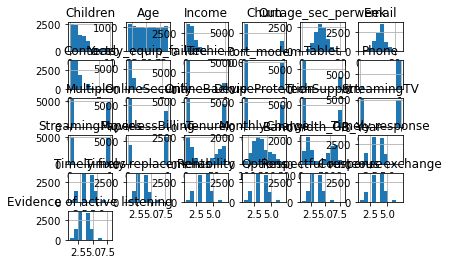

In [16]:
#create histograms of both categorical and continuous variables
df[['Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability', 'Options', 'Respectful response', 'Courteous exchange', 'Evidence of active listening']].hist()
plt.savefig('Churn_plot,jpg')
plt.show()

In [20]:
#export prepared dataset
df.to_csv('Cleaned_churn_d210.csv', index = False)

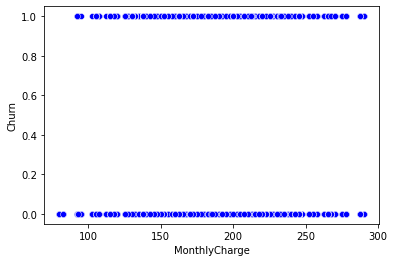

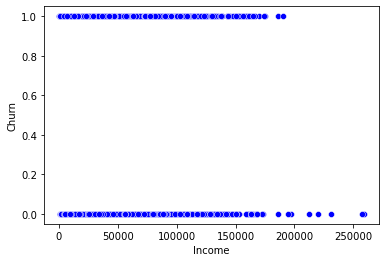

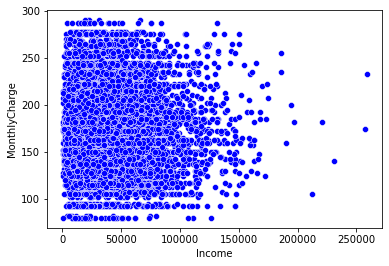

In [18]:
#create scatterplots to look for correlations
sns.scatterplot(x=df['MonthlyCharge'],y=df['Churn'],color='blue')
plt.show();
sns.scatterplot(x=df['Income'],y=df['Churn'],color='blue')
plt.show();
sns.scatterplot(x=df['Income'],y=df['MonthlyCharge'],color='blue')
plt.show();

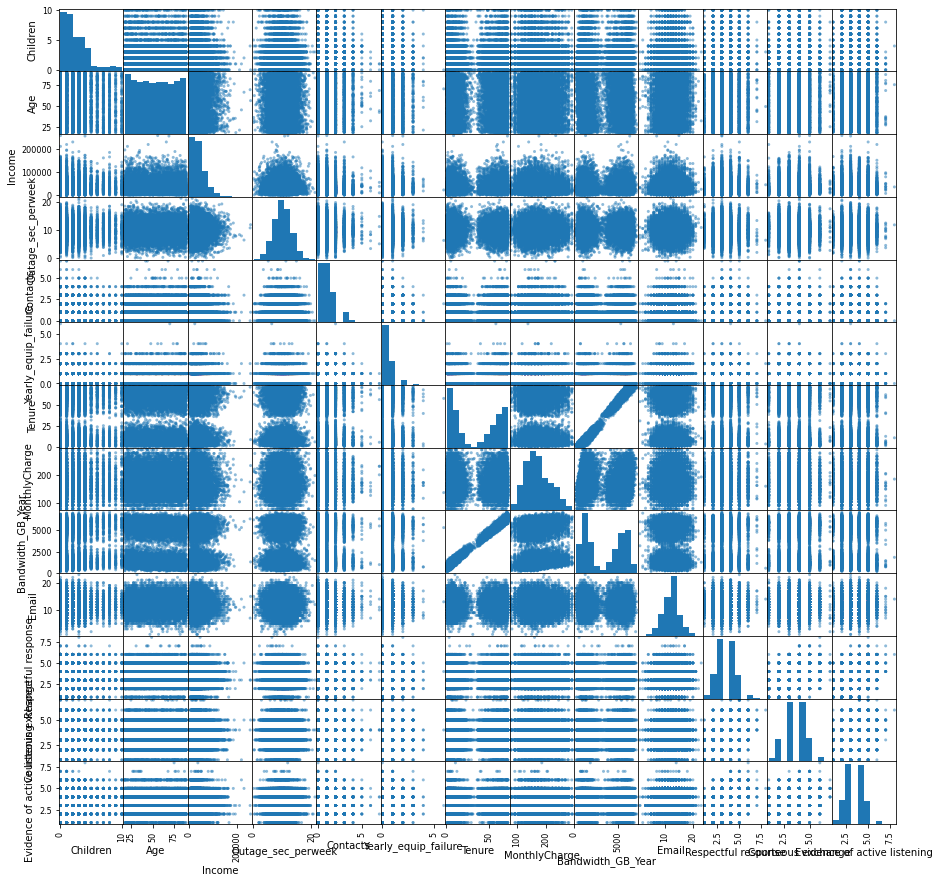

In [19]:
#lets create scatterplots for numeric variables to view distributions and look for relationships
Churn_numeric=df[['Children','Age','Income','Outage_sec_perweek','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year',
'Email','Respectful response','Courteous exchange','Evidence of active listening']]
pd.plotting.scatter_matrix(Churn_numeric,figsize=[15,15]);

<function matplotlib.pyplot.show(close=None, block=None)>

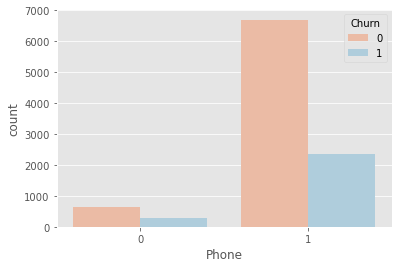

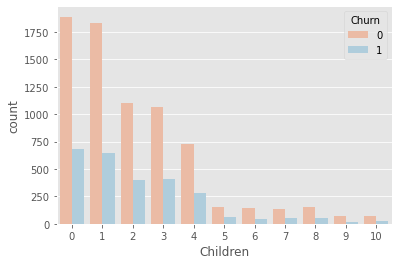

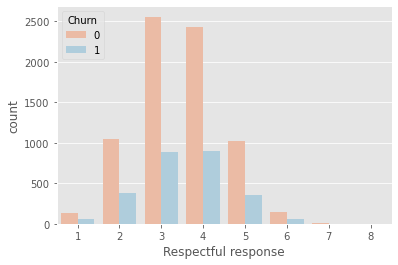

In [20]:
#Lets use a count plot to view featues of binary variables
plt.style.use('ggplot')
plt.figure()
sns.countplot(x='Phone',hue='Churn',data=df,palette='RdBu')
plt.show
plt.figure()
sns.countplot(x='Children',hue='Churn',data=df,palette='RdBu')
plt.show
plt.figure()
sns.countplot(x='Respectful response',hue='Churn',data=df,palette='RdBu')
plt.show

In [21]:
#lets move Churn target variable to end of columns
df=df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability', 'Options', 'Respectful response', 'Courteous exchange', 'Evidence of active listening', 'Churn']]
df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening,Churn
0,0,68,28561.99,7.978323,10,0,1,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,0
1,1,27,21704.77,11.699080,12,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,1
2,4,50,9609.57,10.752800,9,0,1,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,0
3,1,48,18925.23,14.913540,15,2,0,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,0
4,0,83,40074.19,8.147417,16,2,1,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,1


In [22]:
#export prepared dataset
df.to_csv('prepared_d209task1.csv', index = False)

In [23]:
#set predictor variables and target variable
x=df.drop('Churn',axis=1).values
y=df['Churn'].values
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

In [24]:
#set seed in order to reproduce
SEED=1

In [25]:
#create training and test datasets
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=SEED)

In [26]:
#export test and training data
X_train.tofile(r'C:\Users\Ibrahim\Desktop\churn_Xtrain.csv',sep=',')
X_test.tofile(r'C:\Users\Ibrahim\Desktop\churn_Xtest.csv',sep=',')
Y_train.tofile(r'C:\Users\Ibrahim\Desktop\churn_Ytrain.csv',sep=',')
Y_test.tofile(r'C:\Users\Ibrahim\Desktop\churn_Ytest.csv',sep=',')

In [27]:
X_train

array([[0.000000e+00, 4.300000e+01, 1.867706e+04, ..., 4.000000e+00,
        3.000000e+00, 4.000000e+00],
       [0.000000e+00, 4.000000e+01, 3.142951e+04, ..., 3.000000e+00,
        2.000000e+00, 2.000000e+00],
       [4.000000e+00, 7.200000e+01, 1.968504e+04, ..., 3.000000e+00,
        5.000000e+00, 5.000000e+00],
       ...,
       [2.000000e+00, 6.700000e+01, 3.409024e+04, ..., 3.000000e+00,
        4.000000e+00, 1.000000e+00],
       [4.000000e+00, 4.700000e+01, 3.835460e+04, ..., 4.000000e+00,
        6.000000e+00, 3.000000e+00],
       [1.000000e+00, 4.000000e+01, 2.041407e+04, ..., 2.000000e+00,
        2.000000e+00, 1.000000e+00]])

In [46]:
Y_test

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
X_test

In [47]:
Y_train

array([0, 0, 1, ..., 1, 0, 0])

In [28]:
#lets begin KNN model
knn=KNeighborsClassifier(n_neighbors=7)

In [29]:
#fit data to KNN model
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
#predict outcomes from test data
Y_pred=knn.predict(X_test)

In [31]:
#show initial accuracy score of KNN model
print('Initial accuracy score of KNN model: ',accuracy_score(Y_test,Y_pred))

Initial accuracy score of KNN model:  0.7085


In [32]:
#compute classification metrics
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1442
           1       0.47      0.38      0.42       558

    accuracy                           0.71      2000
   macro avg       0.63      0.61      0.61      2000
weighted avg       0.69      0.71      0.70      2000



In [33]:
#scale data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
steps=[('scaler',StandardScaler()),('KNN',KNeighborsClassifier())]
pipeline=Pipeline(steps)

In [34]:
#split data
X_train_scaled,X_test_scaled,Y_train_scaled,Y_test_scaled=train_test_split(x,y,test_size=0.20,random_state=SEED)

In [35]:
#scale data with pipeline
KNN_scaled=pipeline.fit(X_train_scaled,Y_train_scaled)

In [36]:
#predict from scaled data
Y_pred_scaled=pipeline.predict(X_test_scaled)

In [37]:
#show new accuracy score of scaled KNN model
print('New accuracy score of scaled KNN model:{:0.3f}'.format(accuracy_score(Y_test_scaled,Y_pred_scaled)))

New accuracy score of scaled KNN model:0.806


In [38]:
#compute new classification metrics after scaling
print(classification_report(Y_test_scaled,Y_pred_scaled))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1442
           1       0.69      0.56      0.62       558

    accuracy                           0.81      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.80      0.81      0.80      2000



In [39]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(Y_test,Y_pred)
print(cf_matrix)

[[1203  239]
 [ 344  214]]


<AxesSubplot:>

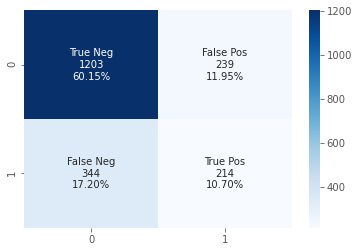

In [40]:
#visualize confustion matrix
group_names=['True Neg','False Pos','False Neg','True Pos']
group_counts=["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in
zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='Blues')

In [41]:
#import GridSearch for cross validation
from sklearn.model_selection import GridSearchCV

In [42]:
#set parameters
param_grid={'n_neighbors':np.arange(1,50)}

In [43]:
#recall KNN for cross validation
KNN=KNeighborsClassifier()

In [44]:
#begin GridSearch cross validation
knn_cv=GridSearchCV(KNN,param_grid,cv=5)

In [45]:
#fit model
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [47]:
#show best parameters
print('Best parameters for the KNN model: {}'.format(knn_cv.best_params_))

Best parameters for the KNN model: {'n_neighbors': 26}


In [48]:
#show model best score
print('Best score for the KNN model: {:.3f}'.format(knn_cv.best_score_))

Best score for the KNN model: 0.742


In [49]:
#import ROC AUC to explain area under curve
from sklearn.metrics import roc_auc_score

In [50]:
#fit to data
knn_cv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [51]:
#determine predicted probabilities
Y_pred_prob=knn_cv.predict_proba(X_test)[:,1]

In [52]:
#determine and show AUC score
print("The Area Under Curve (AUC) on validation data is:{:.4f}".format(roc_auc_score(Y_test,Y_pred_prob)))

The Area Under Curve (AUC) on validation data is:0.9485


In [53]:
#determine cross-validated AUC scores
cv_auc=cross_val_score(knn_cv,x,y,cv=5,scoring='roc_auc')

In [54]:
#show AUC scores
print("AUC scores computed using 5-fold cross validation:{}".format(cv_auc))

AUC scores computed using 5-fold cross validation:[0.50910538 0.60498652 0.7537216  0.77015787 0.67790078]
